### In this project i will be using a linear regression model.
#### Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals)https://www.atptour.com/. Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. 

#### Import the necessary modules

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

#### Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [2]:
df = pd.read_csv("tennis_stats.csv")

#### Show first and last 5 rows of the dataset

In [3]:
df

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


# Exploratory Analysis

## The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

### Identifying Data

    Player: name of the tennis player
    Year: year data was recorded

### Service Game Columns (Offensive)

    Aces: number of serves by the player where the receiver does not touch the ball
    DoubleFaults: number of times player missed both first and second serve attempts
    FirstServe: % of first-serve attempts made
    FirstServePointsWon: % of first-serve attempt points won by the player
    SecondServePointsWon: % of second-serve attempt points won by the player
    BreakPointsFaced: number of times where the receiver could have won service game of the player
    BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when   they had the chance
    ServiceGamesPlayed: total number of games where the player served
    ServiceGamesWon: total number of games where the player served and won
    TotalServicePointsWon: % of points in games where the player served that they won

### Return Game Columns (Defensive)

    FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
    SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
    BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
    BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
    ReturnGamesPlayed: total number of games where the player’s opponent served
    ReturnGamesWon: total number of games where the player’s opponent served and the player won
    ReturnPointsWon: total number of points where the player’s opponent served and the player won
    TotalPointsWon: % of points won by the player

### Outcomes

    Wins: number of matches won in a year
    Losses: number of matches lost in a year
    Winnings: total winnings in USD($) in a year
    Ranking: ranking at the end of year

#### Display useful information about the dataset

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

#### Display the shape of the dataset (number of rows, number of columns)

In [5]:
df.shape

(1721, 24)

#### check for duplicates and sum True values

In [6]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

2


#### Display missing values counts

In [7]:
print(df.isna().sum())

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64


#### Display the relationship between all numeric features on a heat map

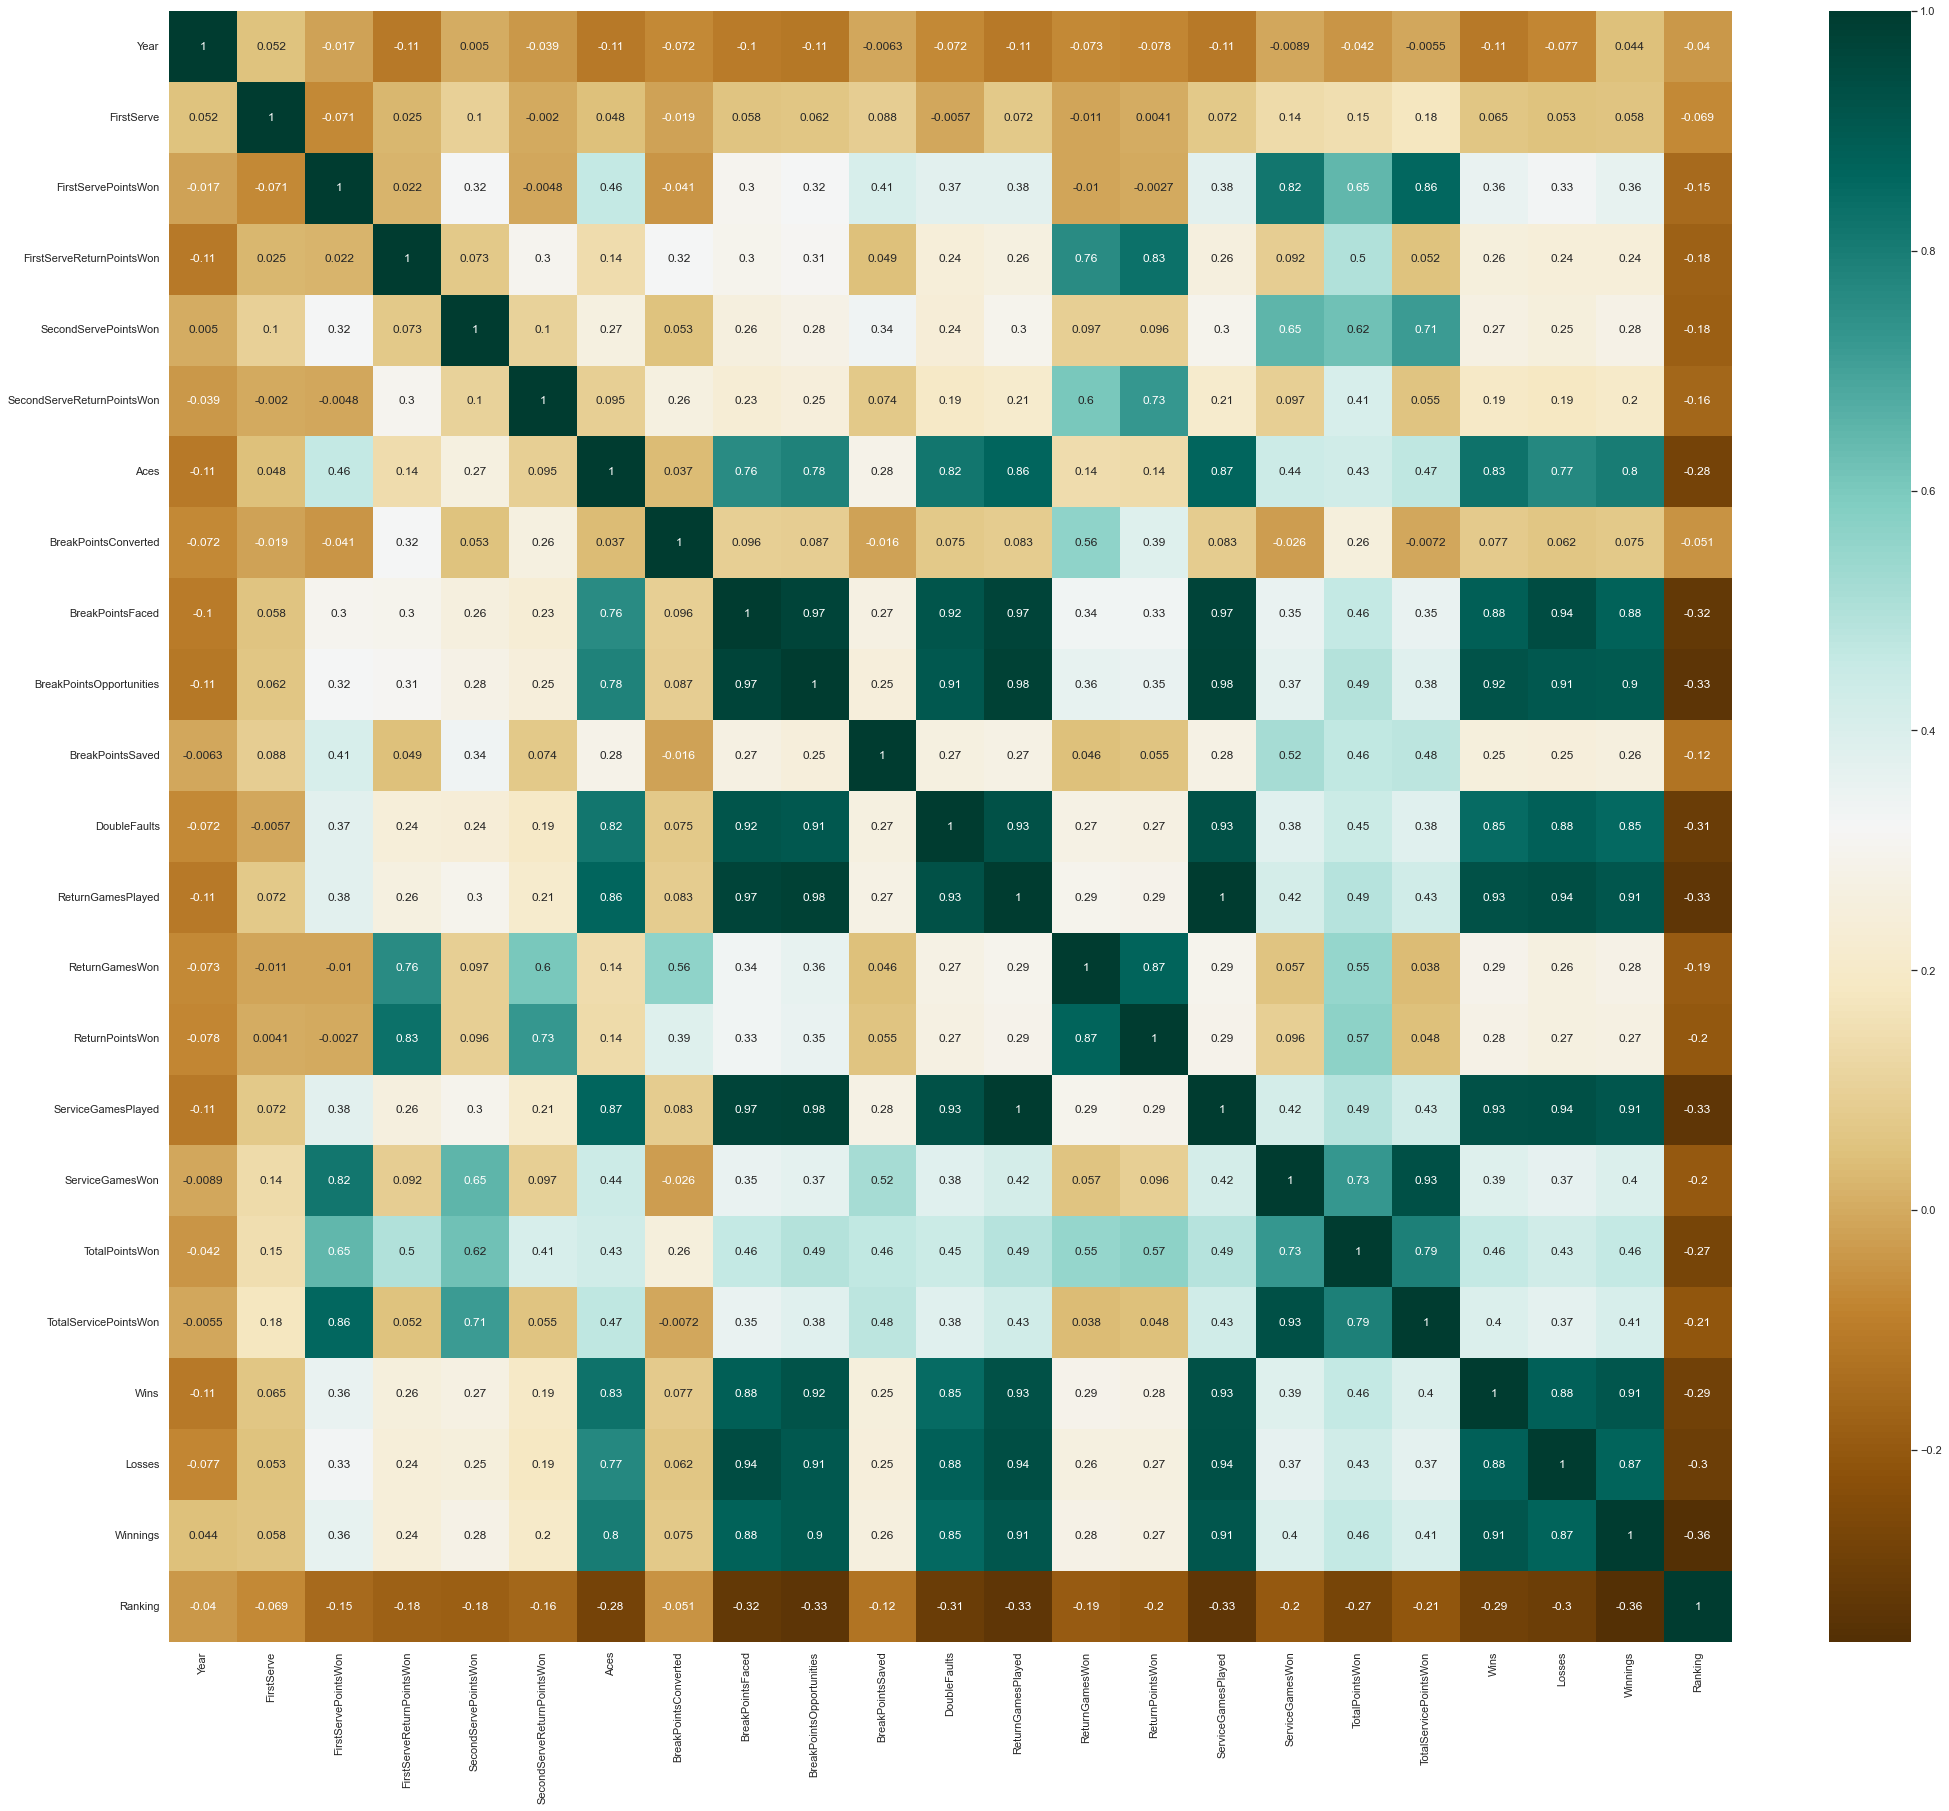

In [8]:
corr = df.corr()
plt.figure(figsize=(35, 30))
sns.set(font_scale=1)
sns.heatmap(corr, cmap="BrBG", annot=True)
plt.show()

#### As we can see there are 6 features that have strong relationship with the winning outcome, so we create our 2 arrays the X and y

In [9]:
X = df[["Aces", "BreakPointsFaced", "BreakPointsOpportunities", "DoubleFaults", "ReturnGamesPlayed", "ServiceGamesPlayed"]].values
y = df["Winnings"].values

#### Define a function that will automate all our work and make it easier for us to repeat the code
#### The function takes an array of featuers as input then we split each feature plus the outcome to a random train and test subsets using the train_test_split function from sklearn with 80% of the data as training set and 20% as the testing set
#### Then we create our linear regression model and train it with our training set so we can get the prediction using the test set
#### Now we can compare the model prediction with the actual values from the test set and visualize the comparison using a scatter plot and a regression plot.

In [10]:
def best_feature_linreg(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    ml = LinearRegression()
    ml.fit(X_train, y_train)
    y_predicted = ml.predict(X_test)

    print("Accuracy score:", ml.score(X_test, y_test))

    plt.clf()
    plt.scatter(y_test, y_predicted)
    plt.plot(range(1000000), range(1000000))
    plt.xlabel("Actual Yearly Earnings")
    plt.ylabel("predicted Yearly Earnings")
    plt.title("Actual Yearly Earnings vs Prediction")
    plt.show()

#### Use Aces feature from the dataset to build a single feature linear regression model and call the function with it

Accuracy score: 0.5349328883918836


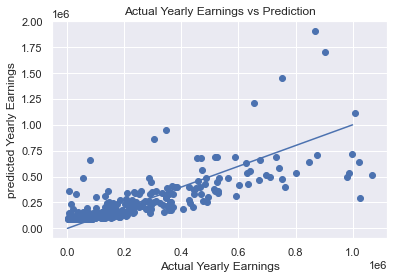

In [11]:
aces = df[["Aces"]]
best_feature_linreg(aces, y)

#### Use BreakPointsFaced feature from the dataset to build a single feature linear regression model and call the function with it

Accuracy score: 0.6994285739867301


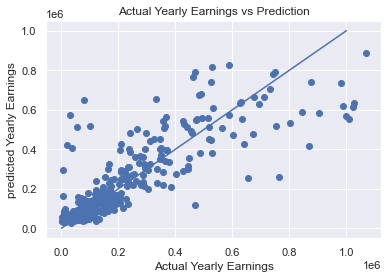

In [12]:
break_points_faced = df[["BreakPointsFaced"]]
best_feature_linreg(break_points_faced, y)

#### Use BreakPointsOpportunities feature from the dataset to build a single feature linear regression model and call the function with it

Accuracy score: 0.7680294368119002


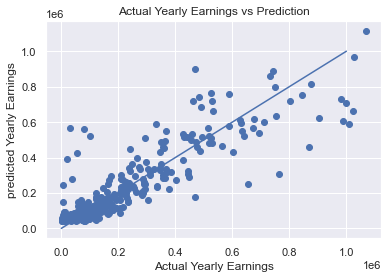

In [13]:
break_points_opportunities = df[["BreakPointsOpportunities"]]
best_feature_linreg(break_points_opportunities, y)

#### Use DoubleFaults feature from the dataset to build a single feature linear regression model and call the function with it

Accuracy score: 0.6704561570154528


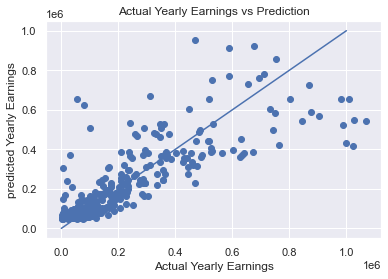

In [14]:
double_faults = df[["DoubleFaults"]]
best_feature_linreg(double_faults, y)

#### Use ReturnGamesPlayed feature from the dataset to build a single feature linear regression model and call the function with it

Accuracy score: 0.8094182590657731


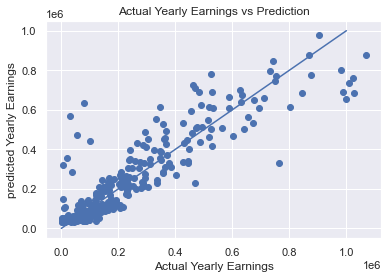

In [15]:
return_games_played = df[["ReturnGamesPlayed"]]
best_feature_linreg(return_games_played, y)

#### Use ServiceGamesPlayed feature from the dataset to build a single feature linear regression model and call the function with it

Accuracy score: 0.8106944780832215


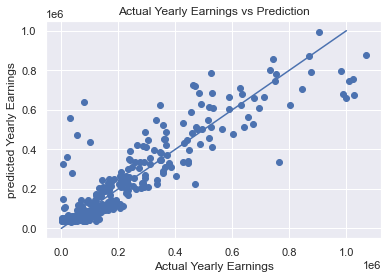

In [16]:
service_games_played = df[["ServiceGamesPlayed"]]
best_feature_linreg(service_games_played, y)

## conclusion
#### Best features so far are ["ServiceGamesPlayed", "ReturnGamesPlayed", "BreakPointsOpportunities"]
#### Let's try multiple features to see if the result gets better


Accuracy score: 0.8284693682304686


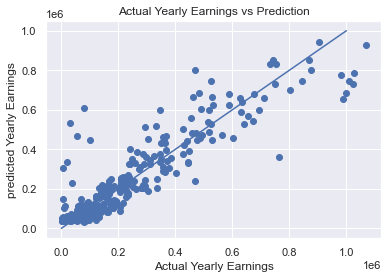

In [17]:
best_feature_linreg(X, y)